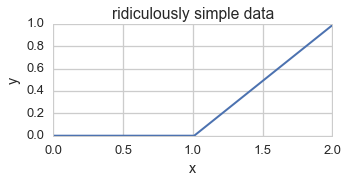

In [1]:
# <!-- collapse=True -->
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
sns.set_context('talk')

n_points = 100
x = np.linspace(0, 2, n_points)
y = np.array([0] * int(n_points/2) + list(x[:50]))

plt.figure(figsize=(5, 2))
plt.plot(x, y, linewidth=2)
plt.title('ridiculously simple data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'net initialized with weigths w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())

'net initialized with weigths w0: 0.08, w1: 0.00'

In [ ]:
from keras.callbacks import Callback

%matplotlib notebook
epochs = 1000
batch_size = 100
n_batches = n_points / batch_size

class PlotLoss(Callback):
    def on_train_begin(self, logs={}):
        fig, (ax1, ax2) = plt.subplots(2, 1)
        self.fig = fig
        self.ax1 = ax1
        ax1.set_xlim([0, n_batches * epochs])
        #ax1.set_ylim([0, 1])
        self.ax2 = ax2
        
        self.losses = []
        self.i = 0

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1
        if self.i % 100 == 0:        
            if len(self.ax1.lines):
                self.ax1.lines[0].set_xdata(range(len(self.losses)))
                self.ax1.lines[0].set_ydata(self.losses)
            else:
                self.ax1.plot(self.losses)
                self.ax1.set_title('training loss')
            self.fig.canvas.draw()
            print(model.layers[0].get_weights())
        
        if self.i % 500 == 0:        
            pred = model.predict(X_train)
            if len(self.ax2.lines):
                self.ax2.lines[0].set_xdata(x)
                self.ax2.lines[0].set_ydata(y)
                self.ax2.lines[1].set_xdata(x)
                self.ax2.lines[1].set_ydata(pred)
            else:
                self.ax2.plot(x, pred, label='prediction')
                self.ax2.plot(x, y, label='data')
                self.ax2.legend(loc='upper left')
            self.fig.canvas.draw()
            
loss = PlotLoss()
%time model.fit(X_train,\
                Y_train,\
                nb_epoch=epochs,\
                batch_size=batch_size,\
                verbose=0,\
                callbacks=[loss])
%matplotlib inline

In [ ]:
pred = model.predict(X_train)
plt.plot(x, pred)
plt.plot(x, y)

In [ ]:
# from keras.optimizers import RMSprop
# opti = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
# model.compile(loss='mean_squared_error', optimizer=opti)

In [ ]:
from keras import backend as K

def get_layer_outoput(layer):
    return K.function([model.layers[0].input],
                      [model.layers[layer].get_output(train=False)])

print('weigths')
print(model.layers[0].get_weights())
#print(model.layers[2].get_weights())
print()

# print('layers for input 0')
# print(get_layer_outoput(0)([X_train[0:1,:]])[0])
# print(get_layer_outoput(1)([X_train[0:1,:]])[0])
# #print(get_layer_outoput(2)([X_train[0:1,:]])[0])
# print()

# print('layers for input 0.5')
# print(get_layer_outoput(0)([X_train[5:6,:]])[0])
# print(get_layer_outoput(1)([X_train[5:6,:]])[0])
# #print(get_layer_outoput(2)([X_train[5:6,:]])[0])
# print()

# print('layers for input 1')
# print(get_layer_outoput(0)([X_train[10:11,:]])[0])
# print(get_layer_outoput(1)([X_train[10:11,:]])[0])
#print(get_layer_outoput(2)([X_train[10:11,:]])[0])